In [4]:
import math
import numpy as np
import random
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [5]:
h = 0.01
t = 0.5
x1 = []
y1 = []

def f(t):
  return math.sin(-2 * math.sin(t) * t * t + 7 * t)

def y(t):
  return math.cos(-1 * math.cos(t) * t * t + t + 2 * math.pi) / 4

while t <= 3.2:
  x1.append(f(t))
  y1.append(y(t))
  t += h
x1 = np.array(x1)
y1 = np.array(y1)

In [123]:
class LinearNet(object):
  def __init__(self, speed = 0.01, iter = 50, delays = 1, epsilon = 1e-6):
    self.speed = speed
    self.iterations = iter
    self.th = random.random()
    self.delays = delays
    self.last_x = np.zeros(delays)
    self.epsilon = epsilon
  
  def predict_one(self):
    sum = 0
    for i in range(self.delays):
      sum += self.last_x[self.delays - i - 1] * self.w[i] + self.th
    return sum
  
  def predict(self, X):
    res = []
    new_last = self.last_x
    for x in X:
        sum = 0
        for i in range(self.delays):
          sum += new_last[self.delays - i - 1] * self.w[i] + self.th
        #аналог move_last_x
        for i in range(self.delays - 1):
          new_last[i] = new_last[i+1]
          new_last[self.delays - 1] = x
        res.append(sum)
    return res

  def move_last_x(self, x):
    for i in range(self.delays - 1):
      self.last_x[i] = self.last_x[i+1]
    self.last_x[self.delays - 1] = x
  
  def fit(self, X, y):
      np.random.seed(42)
      self.w = np.zeros(self.delays)
      loss = []
      XX = X[self.delays:len(X) - 1] #без delays первичных точек
      yy = y[self.delays:len(y) - 1]
      for i in range(self.iterations):
        for j in range(self.delays):
          self.last_x[j] = X[j]
        l = []
        for xi, yi in zip(XX, yy):
          pred = self.predict_one()
          l.append(pred)
          if abs(pred - yi) > self.epsilon:
            for j in range(self.delays):
              self.w[j] -= self.speed * self.last_x[j] * (pred - yi)
            self.th -= self.speed * (pred - yi)
          self.move_last_x(xi)
        loss.append(mean_squared_error(yy, l))
      return loss, l

In [183]:
linear_net = LinearNet(speed=0.01)

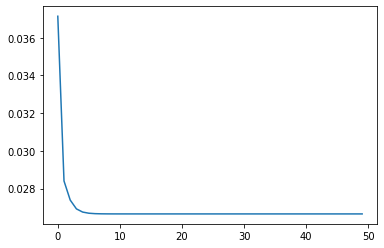

In [184]:
l, pred = linear_net.fit(x1, y1)
plt.plot(l)

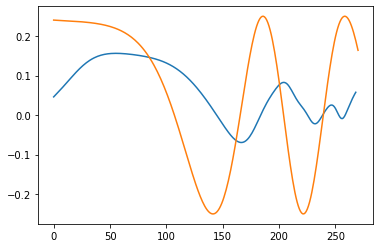

In [185]:
plt.plot(pred)
plt.plot(y1)

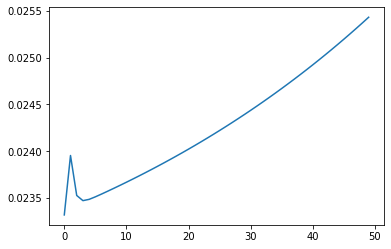

In [186]:
l2, pred = LinearNet(delays = 2,speed=0.01).fit(x1, y1)
plt.plot(l2)

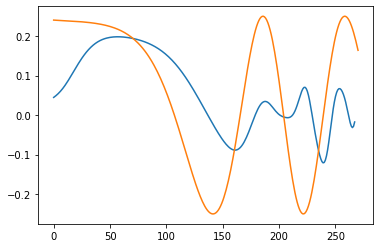

In [187]:
plt.plot(pred)
plt.plot(y1)

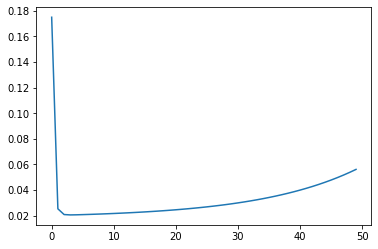

In [188]:
l3, pred = LinearNet(delays = 3, speed=0.01).fit(x1, y1)
plt.plot(l3)

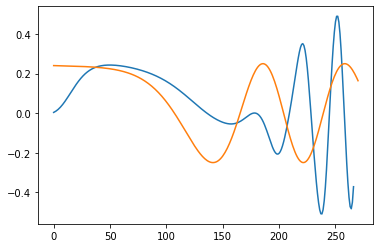

In [189]:
plt.plot(pred)
plt.plot(y1)

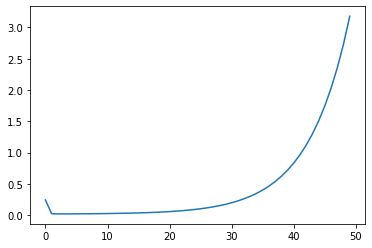

In [190]:
l4, pred = LinearNet(delays = 4, speed=0.01).fit(x1, y1)
plt.plot(l4)

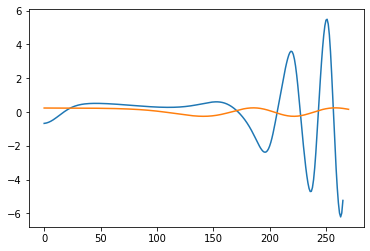

In [191]:
plt.plot(pred)
plt.plot(y1)

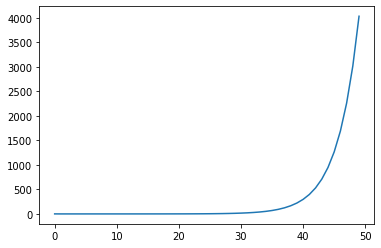

In [192]:
l5, pred = LinearNet(delays = 5, speed=0.01).fit(x1, y1)
plt.plot(l5)

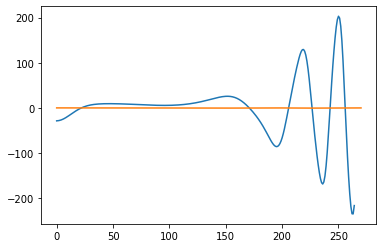

In [193]:
plt.plot(pred)
plt.plot(y1)

threhold =  0.20021566374614044 w [0.03262227]


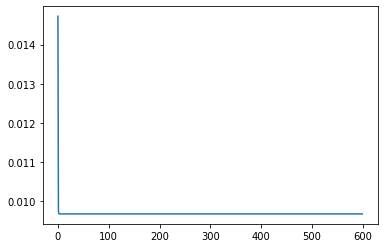

In [196]:
#ВТОРАЯ ЧАСТЬ ЗАДАНИЯ
net2 = LinearNet(iter = 600, speed=0.1)
g, pred = net2.fit(x1, y1)
plt.plot(g)
print('threhold = ', net2.th, 'w', net2.w)

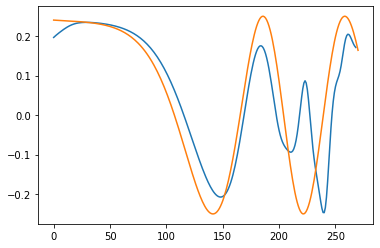

In [197]:
plt.plot(pred)
plt.plot(y1)

threhold =  0.024155271102146027 w [ 0.28491372 -0.35455792]


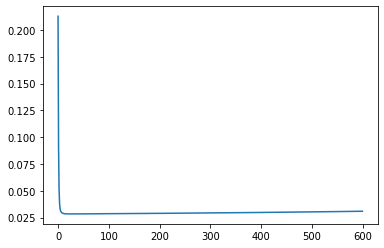

In [442]:
net2 = LinearNet(iter = 600, delays=2, speed = 1e-3)
g2, pred = net2.fit(x1, y1)
plt.plot(g2)
print('threhold = ', net2.th, 'w', net2.w)

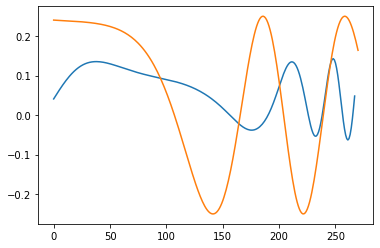

In [443]:
plt.plot(pred)
plt.plot(y1)

threhold =  0.016773449416606134 w [ 0.02457122 -0.02405853 -0.07882825]


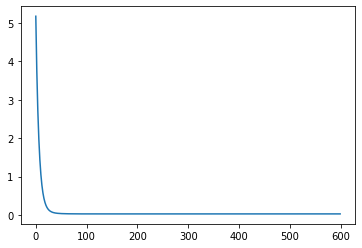

In [139]:
net2 = LinearNet(iter = 600, delays=3, speed = 1e-4)
g3, pred = net2.fit(x1, y1)
plt.plot(g3)
print('threhold = ', net2.th, 'w', net2.w)

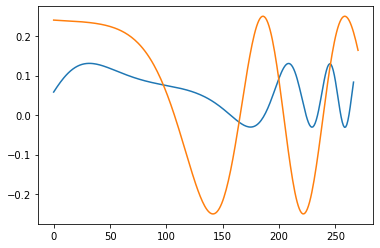

In [140]:
plt.plot(pred)
plt.plot(y1)

In [141]:
#многошаговый прогноз
t = 4
y_test = [y(t)]
x_test = [f(t)]
for i in range(10):
  t += h
  y_test.append(y(t))
  x_test .append(f(t))

x_test = np.array(x_test)
y_test = np.array(y_test)

LOSS 0.008188236151282013


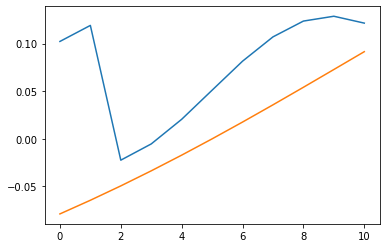

In [142]:
pred = net2.predict(x_test)
plt.plot(pred)
plt.plot(y_test)
print('LOSS', mean_squared_error(pred, y_test))

In [30]:
#ТРЕТЬЯ ЧАСТЬ ЗАДАНИЯ
def j(t):
  return math.cos(math.cos(t) * t * t + t)

x2 = []
t = 0.5
while t <= 4:
  x2.append(j(t))
  t += h

x2 = np.array(x2)

In [31]:
p = np.zeros((4, len(x2))) #?????????
for i in range(4):
  k = 0
  for j in range(i, len(x2)):
    p[i][j] = x2[k]
    k += 1
print(p)

[[0.7522041  0.74048753 0.72850566 ... 0.94653848 0.96820391 0.98470692]
 [0.         0.7522041  0.74048753 ... 0.92029054 0.94653848 0.96820391]
 [0.         0.         0.7522041  ... 0.89003161 0.92029054 0.94653848]
 [0.         0.         0.         ... 0.8563182  0.89003161 0.92029054]]


In [91]:
class LinearNet_Nd(object):
  def __init__(self, speed = 0.01, iter = 50, delays = 1, epsilon = 1e-6):
    self.speed = speed
    self.iterations = iter
    self.th = random.random()
    self.delays = delays
    self.epsilon = epsilon
  
  def predict_one(self):
    sum = 0
    for i in range(self.delays):
      sum += np.dot(self.last_x[self.delays - i - 1], self.w[i]) + self.th
    return sum
  
  def predict(self, X):
    res = []
    new_last = self.last_x
    for x in X:
        sum = 0
        for i in range(self.delays):
          sum += np.dot(new_last[self.delays - i - 1],self.w[i]) + self.th
        #аналог move_last_x
        for i in range(self.delays - 1):
          new_last[i] = new_last[i+1]
          new_last[self.delays - 1] = x
        res.append(sum)
    return res

  def move_last_x(self, x):
    for j in range(self.delays): #сохранение первичных точек
          for k in range(self.delays - 1):
            self.last_x[j][k] = self.last_x[j][k+1]
          self.last_x[j][self.delays - 1] = x[j]
  
  def fit(self, X, y):
      np.random.seed(42)
      self.w = np.zeros((self.delays, self.delays))
      self.last_x = np.zeros((self.delays, self.delays))
      XX = np.zeros((X.shape[0], X.shape[1] - X.shape[0]))
      loss = []
      for j in range(XX.shape[0]):
        k = self.delays
        for i in range(XX.shape[1]):
          XX[j][i] = X[j][k] #без delays первичных точек
          k += 1
      yy = y[self.delays:len(y) - 1]
      XX = XX.transpose()
      for i in range(self.iterations):
        for j in range(self.delays): #сохранение первичных точек
          for k in range(self.delays):
            self.last_x[j][k] = X[j][k]
        l = []
        for xi, yi in zip(XX, yy):
          pred = self.predict_one()
          l.append(pred)
          if abs(pred - yi) > self.epsilon:
            for j in range(self.delays):
              self.w[j] -= self.speed * self.last_x[j] * (pred - yi)
            self.th -= self.speed * (pred - yi)
          self.move_last_x(xi)
        loss.append(mean_squared_error(yy, l))
      return loss, l

In [180]:
net3 = LinearNet_Nd(iter = 25, delays=4, speed = 1e-4)
r3, pred = net3.fit(p, y1)

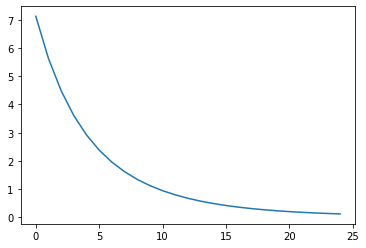

In [181]:
plt.plot(r3)

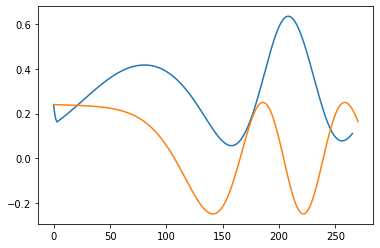

In [182]:
plt.plot(pred)
plt.plot(y1)